<a href="https://colab.research.google.com/github/shadeshsaha/Diabetes-Prediction/blob/main/Diabetics_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score ,confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor 
from sklearn.decomposition import PCA 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import itertools
plt.style.use('fivethirtyeight')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/Machine Learning Bootcamp/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
p = data[data.Outcome == 1]
n = data[data.Outcome == 0]

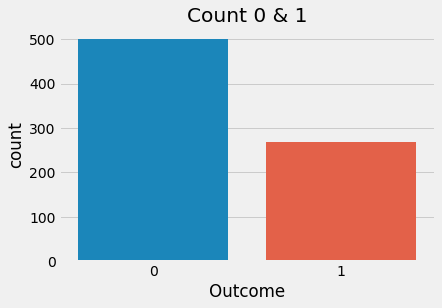

In [ ]:
sns.countplot(x='Outcome',data=data)
plt.title("Count 0 & 1")
plt.show()

In [ ]:
print('Data Shape',data.shape)
print(data.info()) 
describe = data.describe()
describe.T

Data Shape (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


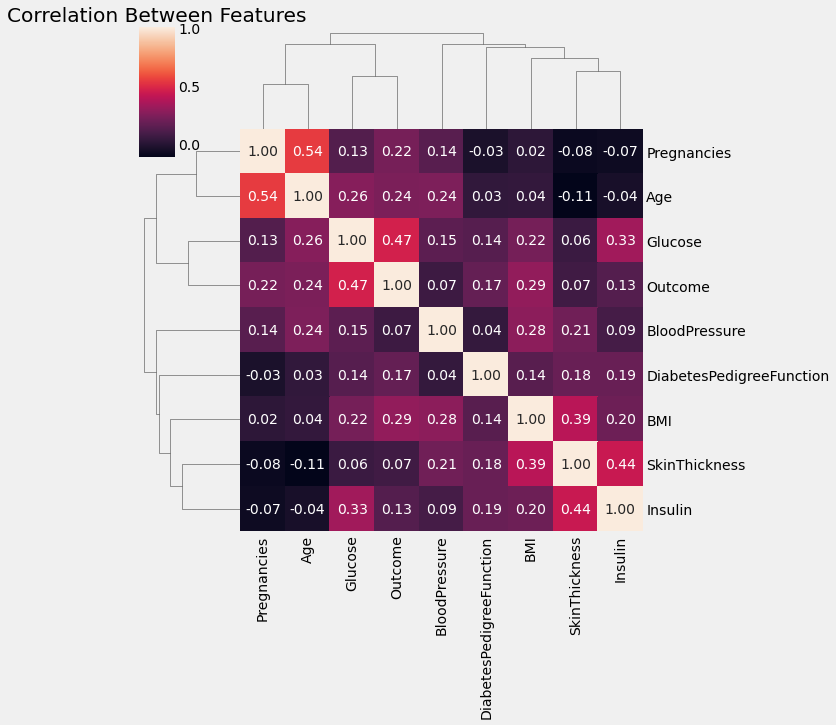

In [ ]:
corr_data = data.corr() 
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation Between Features')
plt.show();

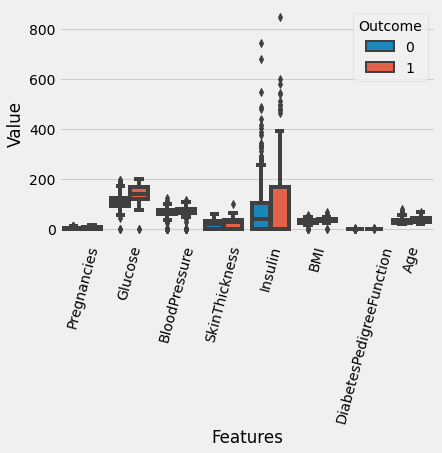

In [ ]:
data_melted = pd.melt(data,id_vars='Outcome',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='Outcome',data=data_melted) 
plt.xticks(rotation=75) 
plt.show()

**Analysis of Diabetic Cases**

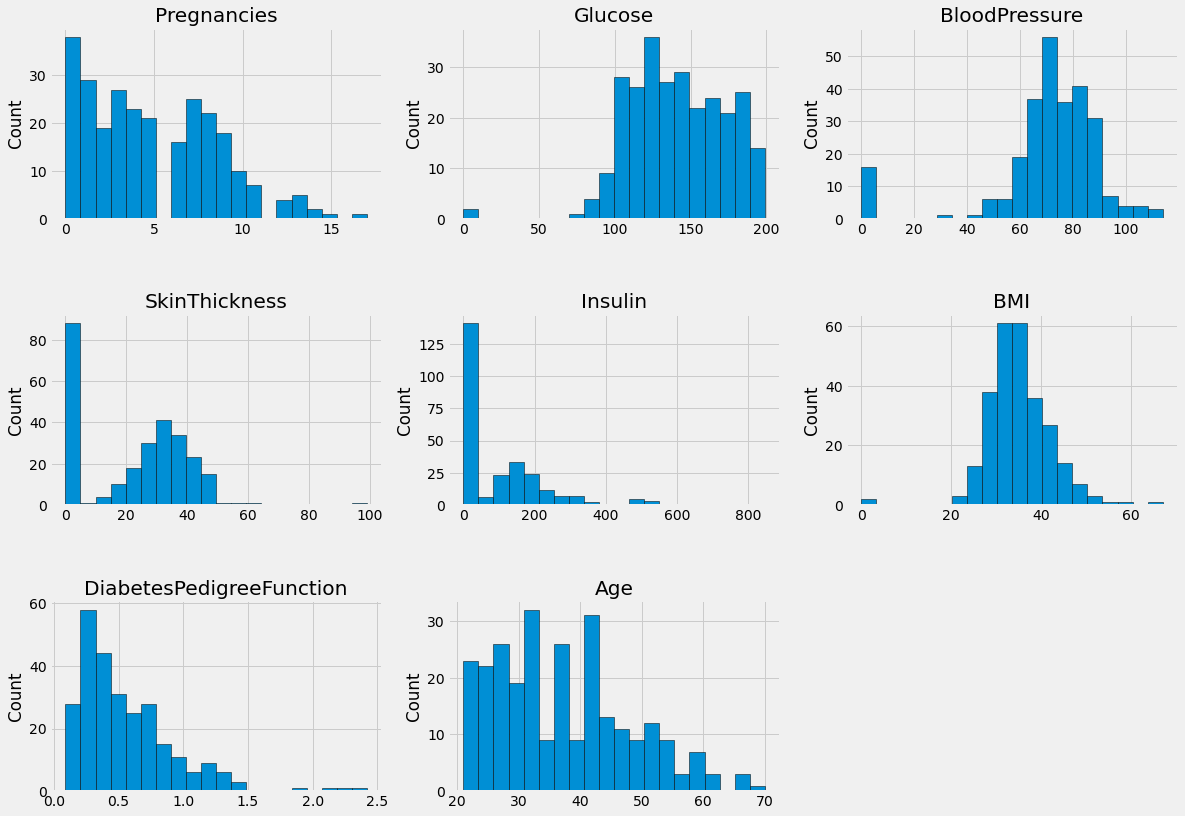

In [ ]:
data1 = data[data["Outcome"]==1]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

**Analysis of Non-Diabetic Cases**

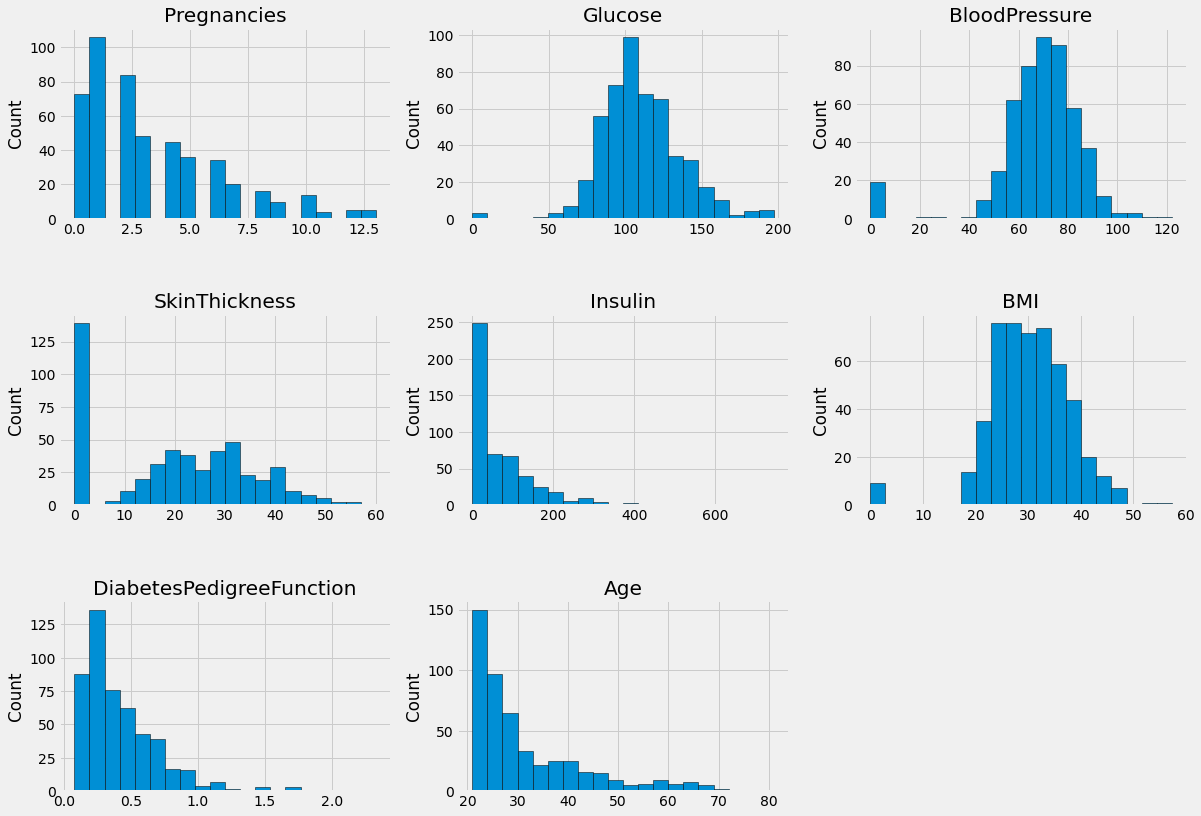

In [ ]:
data1 = data[data["Outcome"]==0]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

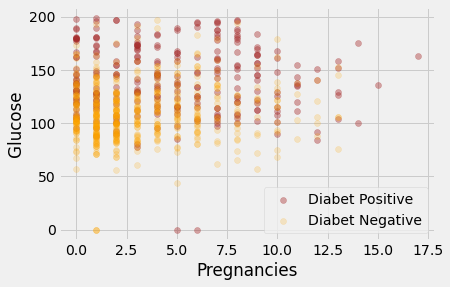

In [ ]:
plt.scatter(p.Pregnancies,p.Glucose,color = "brown",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Pregnancies,n.Glucose,color = "Orange",label="Diabet Negative",alpha=0.2)
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.legend()
plt.show()

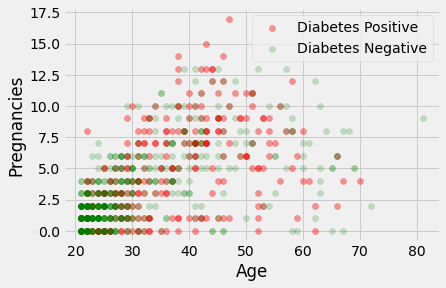

In [ ]:
plt.scatter(p.Age,p.Pregnancies,color = "red",label="Diabetes Positive",alpha=0.4)
plt.scatter(n.Age,n.Pregnancies,color = "green",label="Diabetes Negative",alpha=0.2)
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.legend()
plt.show()


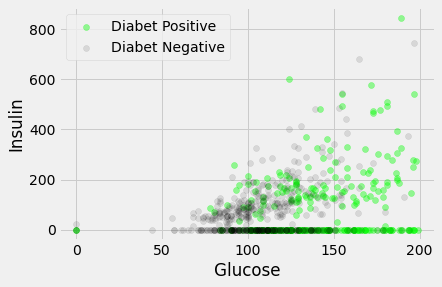

In [ ]:
plt.scatter(p.Glucose,p.Insulin,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Glucose,n.Insulin,color = "black",label="Diabet Negative",alpha=0.1)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()

***Outlier Detection***

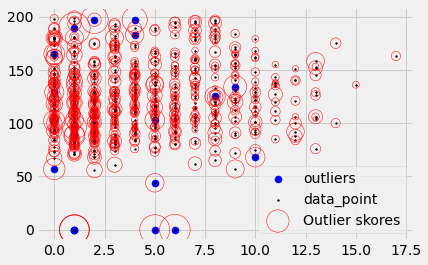

In [ ]:
x = data.drop(['Outcome'],axis=1) 
y = data.Outcome
columns = x.columns.tolist() 

clf = LocalOutlierFactor() 
y_pred = clf.fit_predict(x) 

x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score['score'] = x_score

threshold_outliers = -1.5
filtre = outlier_score['score'] < threshold_outliers
outlier_index = outlier_score[filtre].index.tolist() 

plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1],color = 'blue',s=50,label='outliers')
plt.scatter(x.iloc[:,0]
            ,x.iloc[:,1],color='k',s=3,label='data_point') 

radius = (x_score.max() - x_score ) / (x_score.max() - x_score.min() ) 
outlier_score['radius '] = radius

plt.scatter(x.iloc[:,0], x.iloc[:,1], s=1000*radius, edgecolors='r',facecolor='none',label='Outlier skores')
plt.legend()
plt.show();

In [ ]:
x = x.drop(outlier_index) 
y = y.drop(outlier_index).values 

In [ ]:
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 

x_test = scaler.transform(x_test)

x_train_df = pd.DataFrame(x_train,columns=columns)
x_train_df_describe = x_train_df.describe()
x_train_df['target'] = y_train

**Box Plot Visualization after the Standardization**

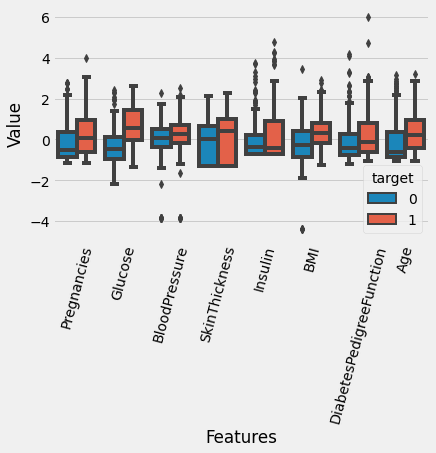

In [ ]:
data_melted = pd.melt(x_train_df,id_vars='target',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='target',data=data_melted) 
plt.xticks(rotation=75) 
plt.show()

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = LR, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7587082728592163
Standart Deviation Accuracies:  0.0593241656716101


In [ ]:
LR.fit(x_train,y_train)
print("Test Accuracy {}".format(LR.score(x_test,y_test))) 

LRscore = LR.score(x_test,y_test)

Test Accuracy 0.8088888888888889


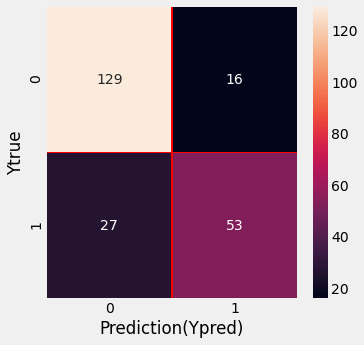

In [ ]:
#Confusion Matrix

yprediciton1= LR.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton1)

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

#K-NN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train) 
y_predict = knn.predict(x_test) 
cm = confusion_matrix(y_test, y_predict) 
acc = accuracy_score(y_test, y_predict) 
score = knn.score(x_test, y_test) 

print("Score:",score)
print("CM:",cm)
print("Basic KNN Acc:",acc)

Score: 0.7066666666666667
CM: [[135  10]
 [ 56  24]]
Basic KNN Acc: 0.7066666666666667


In [ ]:
def KNN_best_parameters(x_train,x_test,y_train,y_test):
    k_range = list(range(1,51))
    weight_options = ['uniform','distance'] 
    distance_options = [1,2]
    print()
    param_grid = dict(n_neighbors=k_range,weights=weight_options,p=distance_options) 

    knn =KNeighborsClassifier() 
    grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy') 
    grid.fit(x_train, y_train) 
    
    print('Best training score: {} with parametres: {}'.format(grid.best_score_,grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_) 
    knn.fit(x_train, y_train)
    
    y_predict_test = knn.predict(x_test)
    y_predict_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test,y_predict_test)
    cm_train = confusion_matrix(y_train,y_predict_train)

    acc_test = accuracy_score(y_test,y_predict_test)  
    acc_train = accuracy_score(y_train,y_predict_train)

    print('Test Score: {}, Train Score: {}'.format(acc_test,acc_train))
    print()
    print('CM Test:',cm_test)
    print('CM Train:',cm_train)
    
    return grid

In [ ]:
grid = KNN_best_parameters(x_train,x_test,y_train,y_test)


Best training score: 0.7642235123367199 with parametres: {'n_neighbors': 36, 'p': 1, 'weights': 'distance'}

Test Score: 0.8177777777777778, Train Score: 1.0

CM Test: [[137   8]
 [ 33  47]]
CM Train: [[342   0]
 [  0 180]]


In [ ]:
KNNscore = grid.best_score_

Text(0.5, 1.0, 'PCA: P1 Vs P2')

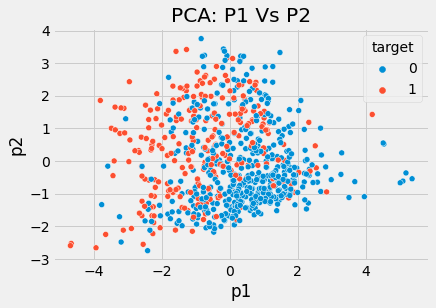

In [ ]:
scale = StandardScaler()
x_scaled = scaler.fit_transform(x) 

pca = PCA(n_components=2) 
pca.fit(x_scaled)
x_reduce_pca = pca.transform(x_scaled) 
pca_data =pd.DataFrame(x_reduce_pca,columns=['p1','p2']) 
pca_data['target'] = y 

sns.scatterplot(x='p1',y='p2',hue='target',data=pca_data) 
plt.title('PCA: P1 Vs P2')

In [ ]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduce_pca,y,test_size=test_size,random_state=42)

grid_pca = KNN_best_parameters(x_train_pca, x_test_pca, y_train_pca, y_test_pca)


Best training score: 0.7277576197387519 with parametres: {'n_neighbors': 14, 'p': 1, 'weights': 'uniform'}

Test Score: 0.7333333333333333, Train Score: 0.7509578544061303

CM Test: [[125  20]
 [ 40  40]]
CM Train: [[305  37]
 [ 93  87]]


Text(0.5, 1.0, "2-Class classification (k = 14, weights = 'uniform')")

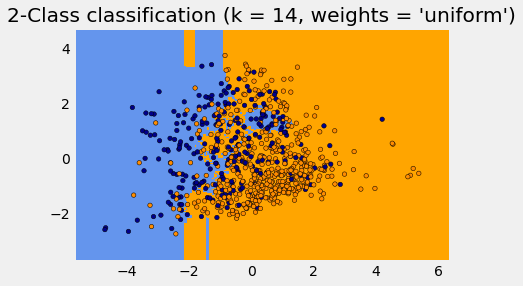

In [ ]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 
X = x_reduce_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))

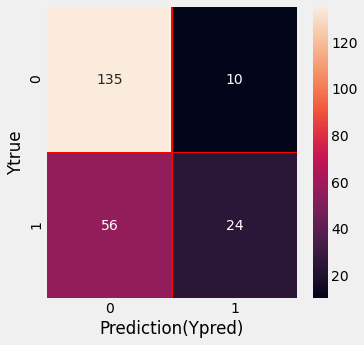

In [ ]:
#Confusion Matrix

yprediciton2= knn.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

#SVM

In [ ]:
from sklearn.svm import SVC
SVM = SVC(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = SVM, X= x_train, y=y_train, cv=5)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7412820512820513
Standart Deviation Accuracies:  0.03222565856288667


In [ ]:
SVM.fit(x_train,y_train)  
print ("SVM Accuracy:", SVM.score(x_test,y_test))
SVMscore = SVM.score(x_test,y_test)

SVM Accuracy: 0.7866666666666666


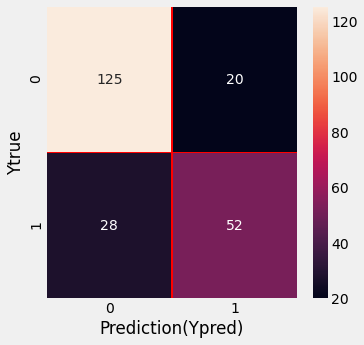

In [ ]:
#Confusion Matrix

yprediciton3= SVM.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton3)

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

#Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [ ]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = NB, X= x_train, y=y_train, cv=35)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7549659863945577
Standart Deviation Accuracies:  0.11221677652262926


In [ ]:
NB.fit(x_train,y_train)
print("Accuracy of NB Score: ", NB.score(x_test,y_test))
NBscore= NB.score(x_test,y_test)

Accuracy of NB Score:  0.7466666666666667


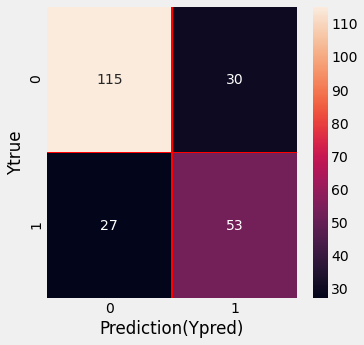

In [ ]:
#Confusion Matrix

yprediciton4= NB.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton4)

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = DTC, X= x_train, y=y_train, cv=55)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7173737373737372
Standart Deviation Accuracies:  0.1438724281581571


In [ ]:
DTC.fit(x_train,y_train)
print("Decision Tree Score: ",DTC.score(x_test,y_test))
DTCscore = DTC.score(x_test,y_test)

Decision Tree Score:  0.6888888888888889


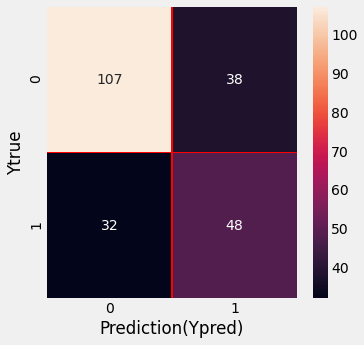

In [ ]:
#Confusion Matrix

yprediciton5= DTC.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton5)

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

#Random Forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train) 
print("Decision Tree Score: ",DTC.score(x_test,y_test))

Decision Tree Score:  0.7155555555555555


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators = 82, random_state=42) 

In [ ]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = RFC, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7663280116110305
Standart Deviation Accuracies:  0.06465725630236509


In [ ]:
RFC.fit(x_train,y_train)
print("Random Forest Score: ",RFC.score(x_test,y_test))
RFCscore=RFC.score(x_test,y_test)

Random Forest Score:  0.8177777777777778


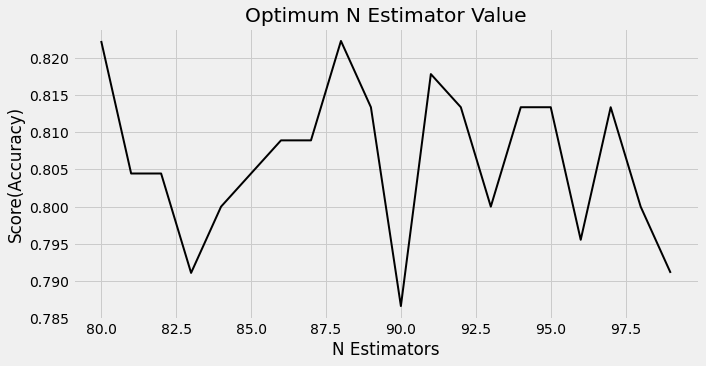

In [ ]:
# now finding optimum K value
scores = []
for each in range(80,100):
    RFfind = RandomForestClassifier(n_estimators = each)
    RFfind.fit(x_train,y_train)
    scores.append(RFfind.score(x_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(80,100),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

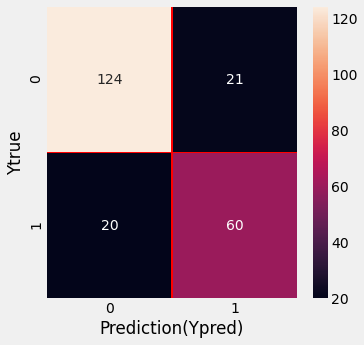

In [ ]:
#Confusion Matrix

yprediciton6= RFC.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton6)

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

#Artificial Neural Network

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential 
from keras.layers import Dense

In [ ]:
def buildclassifier():
    classifier = Sequential()
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu', input_dim =x_train.shape[1]))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
    return classifier

In [ ]:
classifier = KerasClassifier(build_fn = buildclassifier, epochs = 500)
accuracies = cross_val_score(estimator = classifier, X = x_train, y= y_train, cv = 5)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Streaming output truncated to the last 5000 lines.
14/14 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.6758
Epoch 5/500
14/14 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.6607
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.6607
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6497
Epoch 8/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.6525
Epoch 9/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.6691
Epoch 10/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.6207
Epoch 11/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.6647
Epoch 12/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.6407
Epoch 13/500
14/14 [==============================] - 0s 2ms/step -

#ML Algorithms F1-Scores

In [ ]:
#F1-Score for Logistic Regression
from sklearn.metrics import f1_score
LR = f1_score(ytrue, yprediciton1, average='weighted') 
LR

0.8053265153936294

In [ ]:
#K-NN
KNN = f1_score(ytrue, yprediciton2, average='weighted') 
KNN

0.6675647451963242

In [ ]:
#SVM
SVM = f1_score(ytrue, yprediciton3, average='weighted') 
SVM

0.7839161662545626

In [ ]:
#naive bayes
NB = f1_score(ytrue, yprediciton4, average='weighted') 
NB

0.7476739131983782

In [ ]:
#Decision Tree
DT = f1_score(ytrue, yprediciton5, average='weighted') 
DT

0.6912249938722025

In [ ]:
#RandomForest
RF = f1_score(ytrue, yprediciton6, average='weighted') 
RF

0.8180284219399611